In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt
import calendar
from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Load GJGNY dataset into a Dataframe
df = pd.read_csv("Green_Jobs_-_Green_New_York__GJGNY__Residential_Loan_Portfolio___Beginning_November_2010.csv")
df

,Reporting Period,CONTRACT DATE,SETUP DATE,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,ORIGINAL MATURITY DATE,CURRENT MATURITY DATE,INTEREST RATE,CREDIT SCORE CURRENT HIGH,CREDIT SCORE,...,ACCOUNT CODE DATE,CANCEL REASON,TYPE OF BANKRUPTCY,Months Since Origination,Payments Made,Purpose,Loan Type,Underwriting,Pledged,Georeference
0,12/31/2021,01/20/2011,01/24/2011,7920.00,60,01/20/2016,04/23/2013,3.99,790.0,790.0,...,05/17/2013,NaN,NaN,131.4,60.0,Energy Efficiency (EE),Smart Energy,Tier 1,Unpledged,POINT (-78.898159 42.948761)
1,12/31/2021,06/17/2016,06/27/2016,19169.60,180,06/17/2031,11/18/2021,3.99,754.0,753.0,...,11/19/2021,NaN,NaN,66.4,180.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-76.757158 43.096791)
2,12/31/2021,02/10/2011,02/14/2011,9892.69,120,02/10/2021,10/16/2014,3.49,722.0,722.0,...,11/21/2014,NaN,NaN,130.6,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,POINT (-78.83641 42.727748000000005)
3,12/31/2021,08/15/2011,08/19/2011,13000.00,120,08/15/2021,03/03/2021,3.49,754.0,754.0,...,03/03/2021,NaN,NaN,124.5,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,POINT (-75.762715 43.082961)
4,12/31/2021,04/26/2021,04/30/2021,16554.00,180,04/26/2036,04/26/2036,6.99,687.0,687.0,...,04/30/2021,NaN,NaN,8.1,8.0,Solar (PV),Smart Energy,Tier 1,NaN,POINT (-73.783424 42.852843)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34101,12/31/2021,04/16/2013,04/19/2013,4294.52,120,04/16/2023,08/16/2018,2.99,777.0,777.0,...,08/28/2018,NaN,NaN,104.5,120.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,POINT (-72.749509 40.93059)
34102,12/31/2021,04/24/2018,04/30/2018,18080.00,180,04/24/2033,03/16/2020,4.99,739.0,739.0,...,04/08/2020,NaN,NaN,44.2,180.0,Solar (PV),On Bill Recovery,Tier 2,Unpledged,POINT (-73.072068 40.797268)
34103,12/31/2021,11/14/2016,02/20/2020,1919.88,143,11/14/2031,04/15/2032,3.49,NaN,NaN,...,02/20/2020,NaN,NaN,61.5,14.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,POINT (-78.7594 42.928)
34104,12/31/2021,02/26/2021,03/10/2021,2570.00,180,02/28/2036,02/28/2036,6.49,731.0,685.0,...,03/10/2021,NaN,NaN,10.1,10.0,Air Source Heat Pump (ASHP),Companion,Tier 2,NaN,POINT (-73.517198 40.725845)


In [4]:
#Format column headers to snake case and upper case
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.upper()
df.dtypes

REPORTING_PERIOD              object
CONTRACT_DATE                 object
SETUP_DATE                    object
ORIGINAL_LOAN_AMOUNT         float64
ORIGINAL_TERM                  int64
ORIGINAL_MATURITY_DATE        object
CURRENT_MATURITY_DATE         object
INTEREST_RATE                float64
CREDIT_SCORE_CURRENT_HIGH    float64
CREDIT_SCORE                 float64
CREDIT_SCORE_NAME_2          float64
DEBT_TO_INCOME               float64
FIRST_PAYMENT_DATE            object
LAST_PAYMENT_DATE             object
LAST_PAYMENT_AMOUNT          float64
NEXT_PAYMENT_DUE_DATE         object
PAYMENT_AMOUNT               float64
CURRENT_BALANCE              float64
UNAPPLIED_CASH               float64
DELINQUENT_AMOUNT            float64
TOTAL_INTEREST_PAID          float64
TOTAL_LATE_CHARGE_PAID       float64
PAYMENTS_REMAINING             int64
DAYS_DELINQUENT                int64
PROPERTY_COUNTY               object
UTILITY                       object
INSTALLATION_CITY             object
I

In [5]:
#Function to get year delta (Accounts for leap years)
def subtract_years(dt, years):
    try:
        dt = dt.replace(year=dt.year-years)
    except ValueError:
        dt = dt.replace(year=dt.year-years, day=dt.day-1)
    return dt

In [6]:
#Make sure Setup date is in datetime format
df['SETUP_DATE'] = pd.to_datetime(df['SETUP_DATE'])

# Create a column that holds each month
df['SETUP_MONTH'] = pd.to_datetime(df['SETUP_DATE'], format="%Y%m") + MonthEnd(1)

#Create a column that holds each year
df['SETUP_YEAR'] = df['SETUP_DATE'].dt.year


#Get working dates for graphs
date_list =[]
most_recent_date = df['SETUP_MONTH'].max() #Get the most recent date on the
three_years_prior_date = subtract_years(most_recent_date, 3) #Get the date of the past 3 years
three_years_prior_date_str= three_years_prior_date.strftime("%Y-%m")
assisted_date = pd.Timestamp('2016-09-30')

date_list.append(most_recent_date)
date_list.append(three_years_prior_date)
date_list.append(assisted_date)

# #Reformat working dates to only hold year and month
# most_recent_date=most_recent_date.strftime('%Y-%m')
# three_years_prior_date=three_years_prior_date.strftime('%Y-%m')
# assisted_date=assisted_date.strftime('%Y-%m')

most_recent_date, three_years_prior_date, three_years_prior_date_str, assisted_date

(Timestamp('2021-12-31 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 '2018-12',
 Timestamp('2016-09-30 00:00:00'))

In [7]:
df.PURPOSE.unique()

array(['Energy Efficiency (EE)', 'Solar (PV)',
       'Air Source Heat Pump (ASHP)', 'Ground Source Heat Pump (GSHP)',
       'Renewable Heat NY (RHNY)', 'Solar Thermal'], dtype=object)

In [8]:
df.SETUP_YEAR.unique()

array([2011, 2016, 2021, 2012, 2020, 2017, 2019, 2013, 2014, 2015, 2018,
       2010], dtype=int64)

In [9]:
df.UNDERWRITING.unique()

array(['Tier 1', 'Tier 2'], dtype=object)

In [10]:
df.UTILITY.unique()

array(['National Grid', 'Rochester Gas and Electric',
       'NYS Electric and Gas', 'Consolidated Edison',
       'Long Island Power Authority', 'Central Hudson Gas and Electric',
       'Orange and Rockland Utilities', 'Municipal Utilities', nan],
      dtype=object)

In [11]:
df.ACCOUNT_CODE.unique()

array(['Paid in Full', 'SurePay/Automatic Debit Payment',
       'Check/Money Order Payment (with coupon)', 'Legal Category',
       'Canceled', 'Management Hold', 'Soft Hold',
       'Notice of Bankruptcy (written)', 'On Hold',
       'Collections Terminated (by customer)', 'Dispute of Debt'],
      dtype=object)

In [12]:
df.CONTRACTOR_NAME.unique()

array(['HUGHESCO OF BUFFALO INC', 'Halco', 'ENERGY EXPERTS',
       'Kasselman Solar LLC', 'Buffalo Energy Inc', 'GLEASON GEOTHERMAL',
       'Zero Draft of Cny', 'ZERO DRAFT OF CNY', 'RENEWABLE ROCHESTER',
       'Green Home Logic Inc', 'BK SOLUTIONS LLC', 'GREENTHERM',
       'ULTRASPACES LLC', 'John Betlem Heating and Cooling',
       'FOAM IT INSULATION', 'Air Source LLC',
       'HOME ENERGY PERFORMANCE BY HALCO', 'Standard Insulating Co',
       'Zerodraft Residential Inc', 'AMERICAN ENERGY CARE INC',
       'Venture Solar', 'Sunation Solar Systems Inc',
       'COMFORT HOME IMPROVEMENT CO - SYRACUSE', 'Breathe Easy',
       'DUNDON INSULATION INC', 'Energy Savers Inc', 'GREEN AUDIT USA',
       'Green Team LI', 'Brooklyn SolarWorks LLC', 'Phoenix Mechanical',
       'J&A Electrical Construction LLC', 'Ivy Lea Construction',
       'GreenStar Home Services', 'STANDARD INSULATING CO', 'CNY SOLAR',
       'GREENLOGIC LLC', 'ASTRUM SOLAR INC', 'ECOVIS INC',
       'INNOVATED ENERGY 

In [13]:
df.replace(to_replace="Halco", value='HOME ENERGY PERFORMANCE BY HALCO', inplace=True)

df['CONTRACTOR_NAME'] = df['CONTRACTOR_NAME'].str.upper()

## Create a residential loan summary based on loan type

<AxesSubplot:>

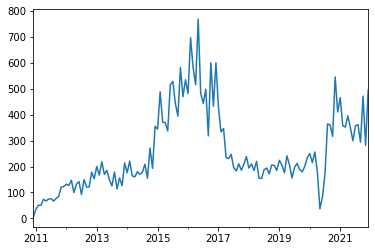

In [14]:
#Plot all loans over time
(df.loc[df['SETUP_DATE'].dt.year.between(2010, 2022), 'SETUP_DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

<AxesSubplot:>

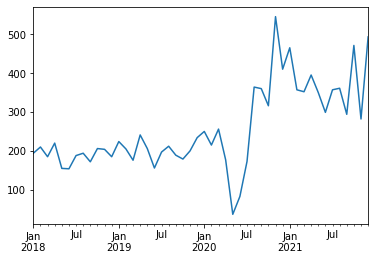

In [15]:
#Plot all loans over the last 3 years

(df.loc[df['SETUP_DATE'].dt.year.between(2018, 2021), 'SETUP_DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

In [16]:
#Create dataframes for each loan purpose
EE_loans_df = df[(df["PURPOSE"] == 'Energy Efficiency (EE)')]
PV_loans_df = df[(df["PURPOSE"] == 'Solar (PV)')]
ASHP_loans_df = df[(df["PURPOSE"] == 'Air Source Heat Pump (ASHP)')]
GSHP_loans_df = df[(df["PURPOSE"] == 'Ground Source Heat Pump (GSHP)')]
RHNY_loans_df = df[(df["PURPOSE"] == 'Renewable Heat NY (RHNY)')]
ST_loans_df = df[(df["PURPOSE"] == 'Solar Thermal')]


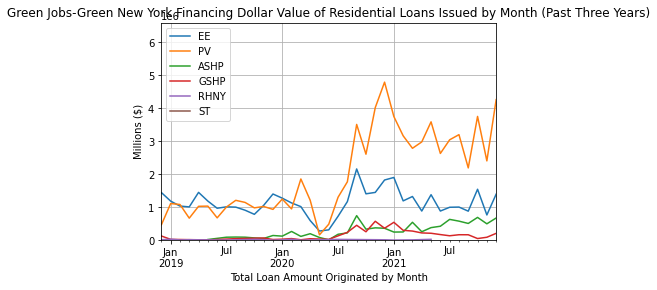

In [17]:
#create data by grouping on month and summing loan amounts
EE_loans_month = EE_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
PV_loans_month = PV_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
ASHP_loans_month = ASHP_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
GSHP_loans_month = GSHP_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
RHNY_loans_month = RHNY_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
ST_loans_month = ST_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)

#Set figure Size and plot
ax = plt.gca()
EE_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
PV_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
ASHP_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
GSHP_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
RHNY_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
ST_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )

#Add legend
ax.legend(["EE", "PV","ASHP", "GSHP","RHNY", "ST"]);

#Label axis
ax.set_xlabel("Total Loan Amount Originated by Month")
ax.set_ylabel("Millions ($)")

#Set Axis limits
plt.gca().set_xlim(left=three_years_prior_date)
plt.gca().set_ylim(bottom=0)

#Add a title.
ax.set_title("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Month (Past Three Years)")

# Add a grid.
ax.grid()


## Create stacked graph for loan purposes (sum of dollars)

In [18]:
#Create groupby year and purpose
df_gb_loan_amt = (df.groupby(['SETUP_YEAR','PURPOSE'])
         ['ORIGINAL_LOAN_AMOUNT'].sum()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_amt = (df_gb_loan_amt.pivot(index= 'SETUP_YEAR',
                     columns='PURPOSE',
                     values='ORIGINAL_LOAN_AMOUNT'))

#Remove all Nan values so that columns can be summed
df_piv_loan_amt = df_piv_loan_amt.fillna(0)

#Combine all solar purposes
df_piv_loan_amt['All PV'] = df_piv_loan_amt["Solar (PV)"] + df_piv_loan_amt["Solar Thermal"]


#combine all 'other' purposes in one column
df_piv_loan_amt['Other'] = df_piv_loan_amt["Air Source Heat Pump (ASHP)"] + df_piv_loan_amt["Ground Source Heat Pump (GSHP)"] + df_piv_loan_amt["Renewable Heat NY (RHNY)"]


#drop unneccessary columns
df_piv_loan_amt.drop(["Solar (PV)",
             "Solar Thermal",
             "Air Source Heat Pump (ASHP)",
             "Ground Source Heat Pump (GSHP)",
             "Renewable Heat NY (RHNY)"],
            axis=1,
            inplace= True)


In [19]:
#Create dataframe holding average interest rate by year
df_gb_ir = (df.groupby(['SETUP_YEAR'])
         ['INTEREST_RATE'].mean()
         .reset_index())

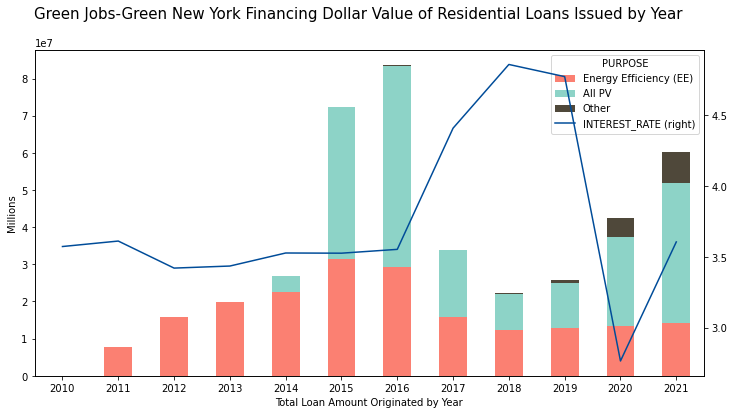

In [20]:
#Create subplot
fig, ax1= plt.subplots()

#add title
fig.suptitle("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Year", fontsize=15)


#Choose colors for purpose
colors ={'Energy Efficiency (EE)':'#fb8072',
        'All PV':'#8dd3c7',
        'Other':'#4f483a'}

#plot bars
df_piv_loan_amt.plot(ax=ax1,
            kind='bar', 
            stacked=True, 
            figsize=(12,6),
            color=colors,
            ylabel= "Millions",
            xlabel="Total Loan Amount Originated by Year")

#plot line
df_gb_ir.plot(y= 'INTEREST_RATE',
              ax=ax1,
              kind='line',
              sharex=True,
              secondary_y=True,
              color = '#004C99'
             )

fig.savefig('Total Loan Amount Originated by Year.png')

## Create stacked graph for loan purposes (loan count)

In [21]:
#Remove successors from dataframe
df_suc_rem = df[df["SUCCESSOR_NUMBER"].str.contains("S-0|s-0", 
                                                 na=True, 
                                                 case= False
                                                )]

#Create groupby month and purpose
df_gb_loan_cnt = (df_suc_rem.groupby(['SETUP_MONTH','PURPOSE'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_cnt = (df_gb_loan_cnt.pivot(index= 'SETUP_MONTH',
                     columns='PURPOSE',
                     values='ORIGINAL_LOAN_AMOUNT'))

#Remove all Nan values so that columns can be summed
df_piv_loan_cnt = df_piv_loan_cnt.fillna(0)

#Combine all solar purposes
df_piv_loan_cnt['All PV'] = df_piv_loan_cnt["Solar (PV)"] + df_piv_loan_cnt["Solar Thermal"]


#combine all 'other' purposes in one column
df_piv_loan_cnt['Other'] = df_piv_loan_cnt["Air Source Heat Pump (ASHP)"] + df_piv_loan_cnt["Ground Source Heat Pump (GSHP)"] + df_piv_loan_cnt["Renewable Heat NY (RHNY)"]


#drop unneccessary columns
df_piv_loan_cnt.drop(["Solar (PV)",
             "Solar Thermal",
             "Air Source Heat Pump (ASHP)",
             "Ground Source Heat Pump (GSHP)",
             "Renewable Heat NY (RHNY)"],
            axis=1,
            inplace= True)

#Trim dataframe to start on september 2016
df_piv_loan_cnt = df_piv_loan_cnt.loc['2016-09-01':]

#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_cnt = df_piv_loan_cnt.reset_index()
df_piv_loan_cnt['SETUP_MONTH'] = df_piv_loan_cnt['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_cnt.set_index('SETUP_MONTH', inplace=True)

df_piv_loan_cnt

PURPOSE,Energy Efficiency (EE),All PV,Other
SETUP_MONTH,,,
2016-09,163.0,149.0,0.0
2016-10,240.0,230.0,2.0
2016-11,259.0,281.0,1.0
2016-12,282.0,307.0,1.0
2017-01,213.0,206.0,1.0
...,...,...,...
2021-08,125.0,170.0,53.0
2021-09,112.0,119.0,47.0
2021-10,196.0,208.0,51.0


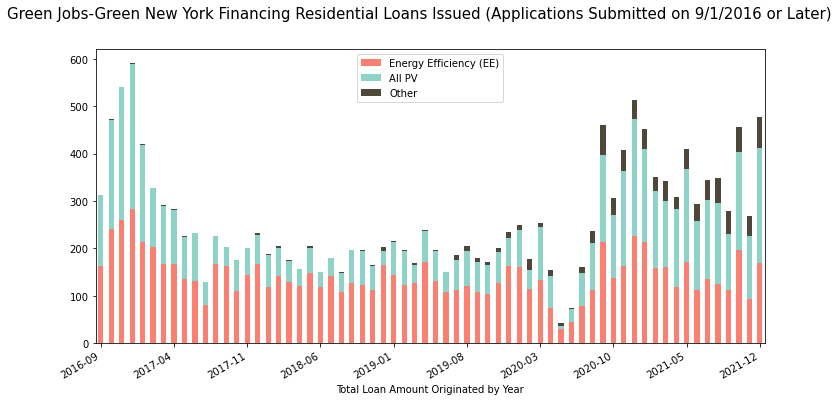

In [22]:
#Create subplot
fig, ax2= plt.subplots()

#add title
fig.suptitle("Green Jobs-Green New York Financing Residential Loans Issued (Applications Submitted on 9/1/2016 or Later)",
             fontsize=15)


#Choose colors for purpose
colors ={'Energy Efficiency (EE)':'#fb8072',
        'All PV':'#8dd3c7',
        'Other':'#4f483a'}



#PLOT EACH COLUMN SEPearately using ax2.plot()



#plot bars
df_piv_loan_cnt.plot(ax=ax2,
                     kind='bar', 
                     stacked=True,
                     figsize=(12,6),
                     color=colors,
                     xlabel="Total Loan Amount Originated by Year"
                    ).legend(loc='best')

#Rotate date labels
fig.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax2.locator_params(axis='x', nbins=10)

#Save Graph
fig.savefig('Total Loan Amount Originated by Year.png')

# Create quantitative graphs to view how Smart Energy Loans Compare to OBR (2 graphs, past 3 years and Program to Date)

## Create count dataframes

In [23]:
#Create groupby month and loan type
df_gb_loan_type = (df.groupby(['SETUP_MONTH','LOAN_TYPE'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_type = (df_gb_loan_type.pivot(index= 'SETUP_MONTH',
                     columns='LOAN_TYPE',
                     values='ORIGINAL_LOAN_AMOUNT'))


#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_type = df_piv_loan_type.reset_index()
df_piv_loan_type['SETUP_MONTH'] = df_piv_loan_type['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_type.set_index('SETUP_MONTH', inplace=True)

#Trim dataframe to start on 3 years prior from the most recent date
df_piv_loan_type_cnt_L3Y = df_piv_loan_type.loc[three_years_prior_date_str:]

## Create Percent dataframes

In [24]:
#Create dataframe holding percentages for each type rate by year
df_piv_loan_type_pct = pd.crosstab(df.SETUP_MONTH, df.LOAN_TYPE, normalize='index')


#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_type_pct = df_piv_loan_type_pct.reset_index()
df_piv_loan_type_pct['SETUP_MONTH'] = df_piv_loan_type_pct['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_type_pct.set_index('SETUP_MONTH', inplace=True)


#Trim dataframe to start on 3 years prior from the most recent date
df_piv_loan_type_pct_L3Y = df_piv_loan_type_pct.loc[three_years_prior_date_str:]

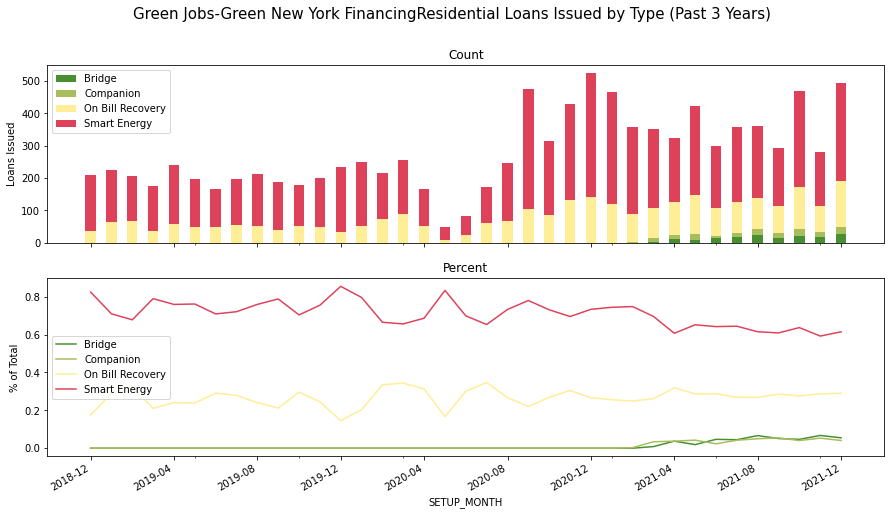

In [25]:
#Create subplot
fig3, (ax3,ax4) = plt.subplots(2,sharex=True)

#add title
fig3.suptitle("Green Jobs-Green New York FinancingResidential Loans Issued by Type (Past 3 Years)", fontsize=15)

#add subplot titles
ax3.set_title('Count')
ax4.set_title('Percent')

#Choose fig size
fig3.set_figheight(8)
fig3.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Bridge':'#488f31',
         'Companion': '#a8bd5c',
         'On Bill Recovery':'#ffed97',
         'Smart Energy':'#de425b'
         }
#plot bars
df_piv_loan_type_cnt_L3Y.plot(ax=ax3,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_loan_type_pct_L3Y.plot(ax=ax4,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

ax3.autoscale(enable=True, axis='both', tight=None)
ax4.autoscale(enable=True, axis='both', tight=None)


#Rotate date labels
fig3.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax3.locator_params(axis='x', nbins=10)

#Save Graph
fig3.savefig('Green Jobs-Green New York FinancingResidential Loans Issued by Type (Past 3 Years).png')

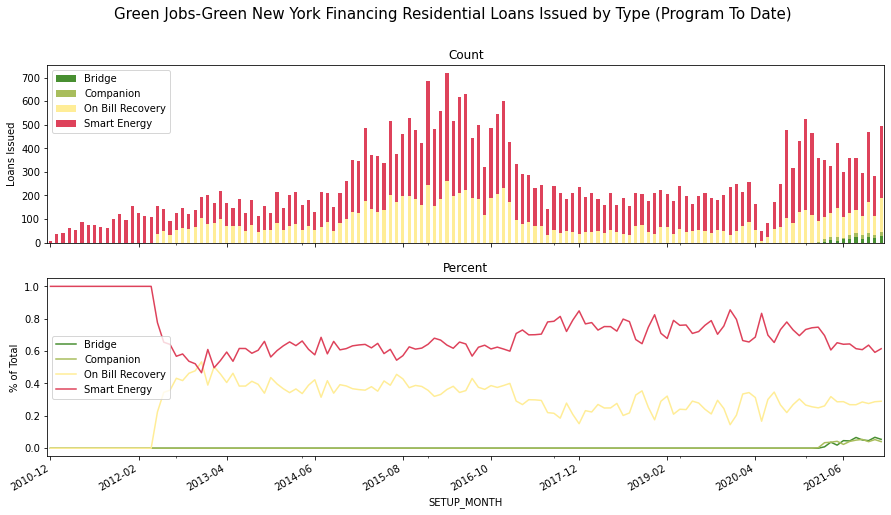

In [26]:
#Create subplot
fig4, (ax5,ax6) = plt.subplots(2,sharex=True)

#add title
fig4.suptitle("Green Jobs-Green New York Financing Residential Loans Issued by Type (Program To Date)", fontsize=15)

#add subplot titles
ax5.set_title('Count')
ax6.set_title('Percent')

#Choose fig size
fig4.set_figheight(8)
fig4.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Bridge':'#488f31',
         'Companion': '#a8bd5c',
         'On Bill Recovery':'#ffed97',
         'Smart Energy':'#de425b'
         }


#plot bars
df_piv_loan_type.plot(ax=ax5,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_loan_type_pct.plot(ax=ax6,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

#Autoscale axis
ax3.autoscale(enable=True, axis='both', tight=None)
ax4.autoscale(enable=True, axis='both', tight=None)


#Rotate date labels
fig4.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax5.locator_params(axis='x', nbins=10)

#Save Graph
fig4.savefig('Green Jobs-Green New York Financing Residential Loans Issued by Type (Program To Date).png')

# Create quantitative graphs to view how Tier 1 Loans Compare Underwriting (2 graphs, past 3 years and Program to Date)

In [27]:
#Create groupby month and loan type
df_gb_Underwriting = (df.groupby(['SETUP_MONTH','UNDERWRITING'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_Underwriting = (df_gb_Underwriting.pivot(index= 'SETUP_MONTH',
                     columns='UNDERWRITING',
                     values='ORIGINAL_LOAN_AMOUNT'))


#Reformat SETUP_MONTH to not hold last day of month
df_piv_Underwriting = df_piv_Underwriting.reset_index()
df_piv_Underwriting['SETUP_MONTH'] = df_piv_Underwriting['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_Underwriting.set_index('SETUP_MONTH', inplace=True)

#Trim dataframe to start on 3 years prior from the most recent date
df_piv_Underwriting_cnt_L3Y = df_piv_Underwriting.loc[three_years_prior_date_str:]

In [28]:
#Create dataframe holding percentages for each type rate by year
df_piv_Underwriting_pct = pd.crosstab(df.SETUP_MONTH, df.UNDERWRITING, normalize='index')


#Reformat SETUP_MONTH to not hold last day of month
df_piv_Underwriting_pct = df_piv_Underwriting_pct.reset_index()
df_piv_Underwriting_pct['SETUP_MONTH'] = df_piv_Underwriting_pct['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_Underwriting_pct.set_index('SETUP_MONTH', inplace=True)


#Trim dataframe to start on 3 years prior from the most recent date
df_piv_Underwriting_pct_L3Y = df_piv_Underwriting_pct.loc[three_years_prior_date_str:]

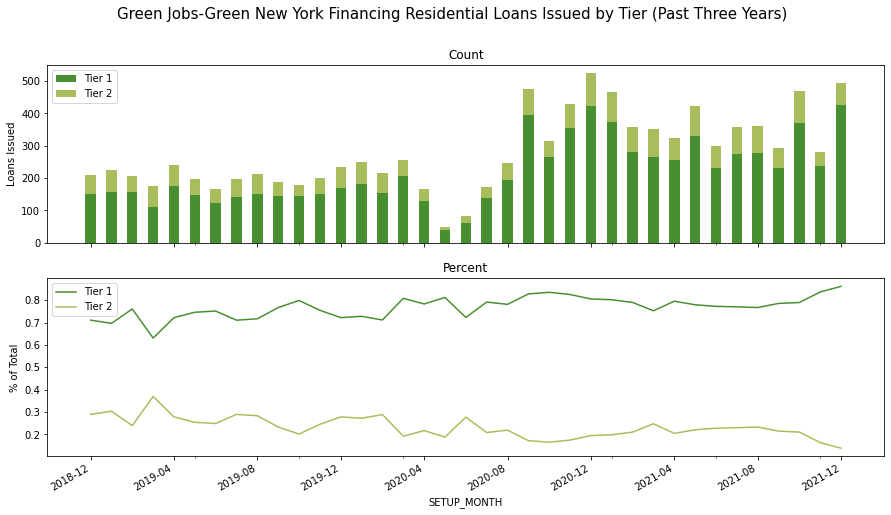

In [29]:
#Create subplot
fig5, (ax7,ax8) = plt.subplots(2,sharex=True)

#add title
fig5.suptitle("Green Jobs-Green New York Financing Residential Loans Issued by Tier (Past Three Years)", fontsize=15)

#add subplot titles
ax7.set_title('Count')
ax8.set_title('Percent')

#Choose fig size
fig5.set_figheight(8)
fig5.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Tier 1':'#488f31',
         'Tier 2': '#a8bd5c'
         }
#plot bars
df_piv_Underwriting_cnt_L3Y.plot(ax=ax7,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_Underwriting_pct_L3Y.plot(ax=ax8,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

ax7.autoscale(enable=True, axis='both', tight=None)
ax8.autoscale(enable=True, axis='both', tight=None)


#Rotate date labels
fig5.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax7.locator_params(axis='x', nbins=10)

#Save Graph
fig5.savefig('Green Jobs-Green New York FinancingResidential Loans Issued by Tier(Past Three Years).png')

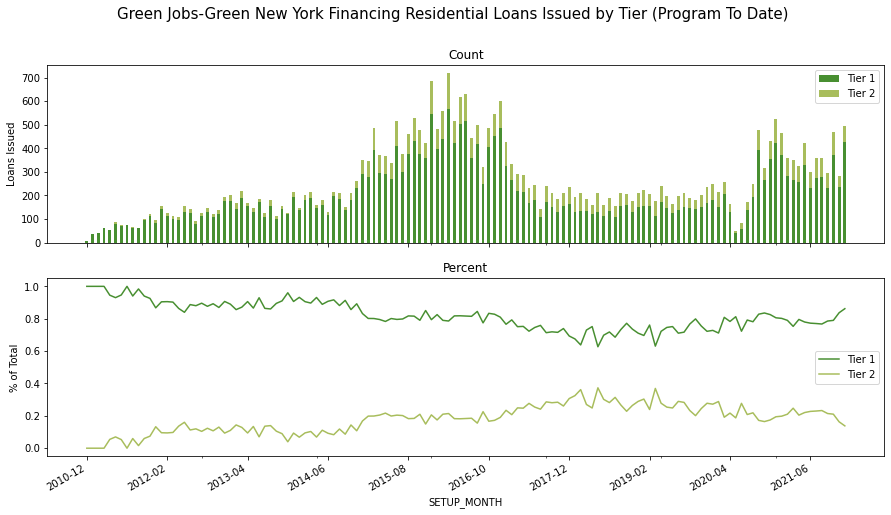

In [30]:
#Create subplot
fig6, (ax9,ax10) = plt.subplots(2,sharex=True)

#add title
fig6.suptitle("Green Jobs-Green New York Financing Residential Loans Issued by Tier (Program To Date)", fontsize=15)

#add subplot titles
ax9.set_title('Count')
ax10.set_title('Percent')

#Choose fig size
fig6.set_figheight(8)
fig6.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Tier 1':'#488f31',
         'Tier 2': '#a8bd5c'
         }


#plot bars
df_piv_Underwriting.plot(ax=ax9,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_Underwriting_pct.plot(ax=ax10,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

#Autoscale axis
ax9.autoscale(enable=True, axis='both', tight=None)
ax10.autoscale(enable=True, axis='both', tight=None)


#Rotate date labels
fig6.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax9.locator_params(axis='x', nbins=10)

#Save Graph
fig6.savefig('Green Jobs-Green New York Financing Residential Loans Issued by Type (Program To Date).png')

## Create a dataframes showing a summary of all utility companies

In [31]:
#Create groupby Utility to get count (without Successors)
df_gb_UTILITY_cnt = (df_suc_rem.groupby(['UTILITY'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

df_gb_UTILITY_cnt

,UTILITY,ORIGINAL_LOAN_AMOUNT
0,Central Hudson Gas and Electric,1524
1,Consolidated Edison,2513
2,Long Island Power Authority,10420
3,Municipal Utilities,221
4,NYS Electric and Gas,4895
5,National Grid,9068
6,Orange and Rockland Utilities,826
7,Rochester Gas and Electric,3940


In [32]:
#Create groupby Utility to get sum of original loan amt (without Successors)
df_gb_UTILITY_orig_sum = (df_suc_rem.groupby(['UTILITY'])
         ['ORIGINAL_LOAN_AMOUNT'].sum()
         .reset_index())

df_gb_UTILITY_orig_sum

,UTILITY,ORIGINAL_LOAN_AMOUNT
0,Central Hudson Gas and Electric,2.092980e+07
1,Consolidated Edison,3.927398e+07
2,Long Island Power Authority,1.628427e+08
3,Municipal Utilities,1.865179e+06
4,NYS Electric and Gas,5.029109e+07
5,National Grid,8.580490e+07
6,Orange and Rockland Utilities,1.085294e+07
7,Rochester Gas and Electric,3.167718e+07


In [33]:
#Create groupby Utility to get outstanding loan amt (with Successors)
df_gb_UTILITY_remaining_sum = (df.groupby(['UTILITY'])
         ['CURRENT_BALANCE'].sum()
         .reset_index())

df_gb_UTILITY_remaining_sum

,UTILITY,CURRENT_BALANCE
0,Central Hudson Gas and Electric,1.207327e+07
1,Consolidated Edison,2.410060e+07
2,Long Island Power Authority,1.091253e+08
3,Municipal Utilities,9.874088e+05
4,NYS Electric and Gas,2.831251e+07
5,National Grid,4.725244e+07
6,Orange and Rockland Utilities,6.321173e+06
7,Rochester Gas and Electric,1.934235e+07


## Create graph showing loan performance (Months since origination) vs charge off and delinquent amt (Does DTI and Credit Score have an impact?)

(array([235., 167.,  68.,  49.,  28.,  15.,   8.,   5.,   1.,   2.]),
 array([-4.9900000e+00,  1.4983890e+03,  3.0017680e+03,  4.5051470e+03,
         6.0085260e+03,  7.5119050e+03,  9.0152840e+03,  1.0518663e+04,
         1.2022042e+04,  1.3525421e+04,  1.5028800e+04]),
 <BarContainer object of 10 artists>)

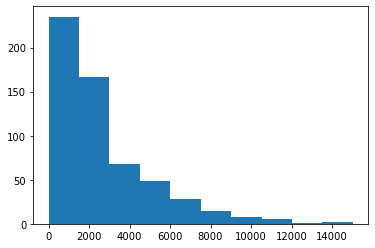

In [34]:
#Create a df with loans that are only in the legal category
df_LC = df[df.ACCOUNT_CODE == 'Legal Category']

#Look at Delinquency amount distribution
plt.hist(df_LC['DELINQUENT_AMOUNT'])

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No handles with labels found to put in legend.


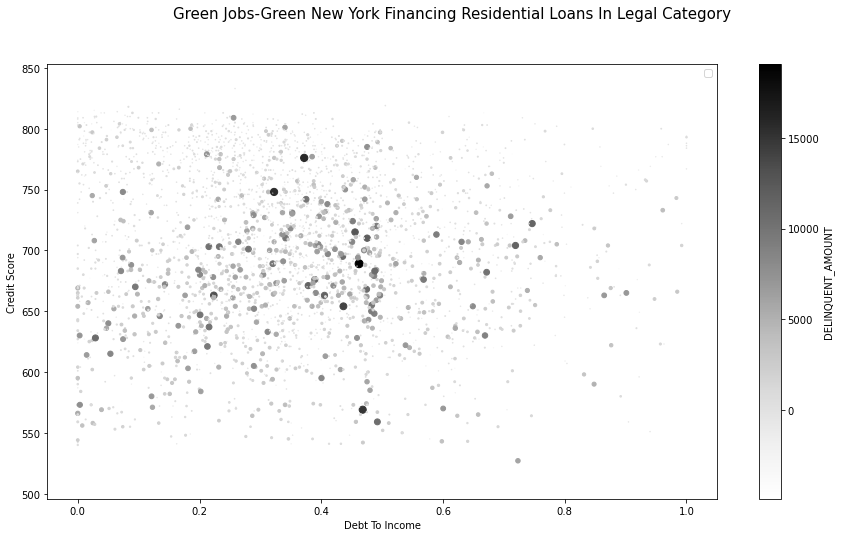

In [35]:
#REmove canceled loans:
df_NCL = df[(df.CANCEL_REASON != 'DEATH')]


#Create subplot
fig7, ax11 = plt.subplots(figsize=(15, 8))

#add title
fig7.suptitle("Green Jobs-Green New York Financing Residential Loans In Legal Category", fontsize=15)

#plot scatter dots. 
df_NCL.plot(ax=ax11,
            x='DEBT_TO_INCOME',
            y='CREDIT_SCORE_CURRENT_HIGH',
            s=df_NCL.DELINQUENT_AMOUNT/300,
            c='DELINQUENT_AMOUNT',
            kind='scatter',
            ylabel= "Credit Score",
            xlabel= "Debt To Income").legend(loc='best')

#Scatter plot shows that the best borrowers are those with 700+ Credit Score and DTI below ~18%

In [36]:
#Create a df with loans that are delinquent over 120 days
df_DD = (df[(df.DAYS_DELINQUENT > 120)  & (df.CANCEL_REASON != 'DEATH')])

No handles with labels found to put in legend.


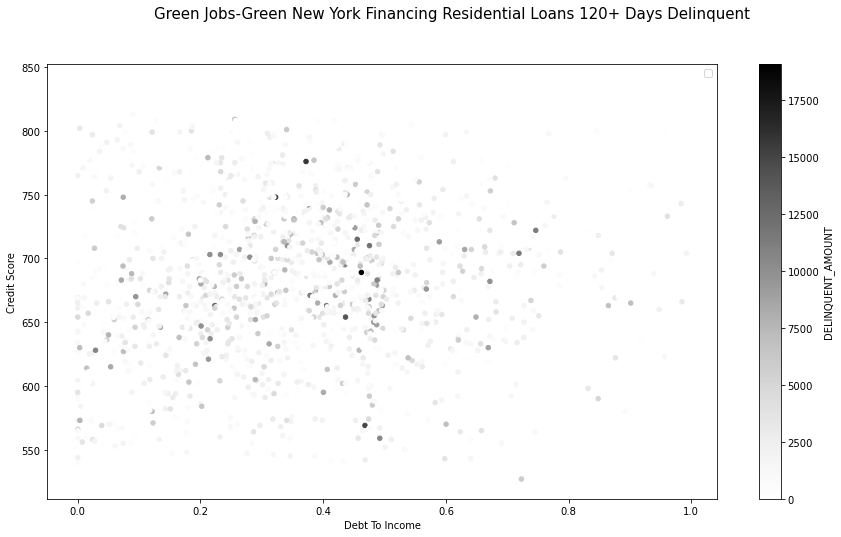

In [37]:
#Create subplot
fig8, ax12 = plt.subplots(figsize=(15, 8))

#add title
fig8.suptitle("Green Jobs-Green New York Financing Residential Loans 120+ Days Delinquent", fontsize=15)

#Set red color for loans over 3000 delin


#plot scatter dots. 
df_DD.plot(ax=ax12,
        x='DEBT_TO_INCOME',
        y='CREDIT_SCORE_CURRENT_HIGH',
        c='DELINQUENT_AMOUNT',
        kind='scatter',  
        ylabel= "Credit Score",
        xlabel= "Debt To Income").legend(loc='best')

#Under .25 DTI and over 720 Credit score seems to be the best borrowers.

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
No handles with labels found to put in legend.


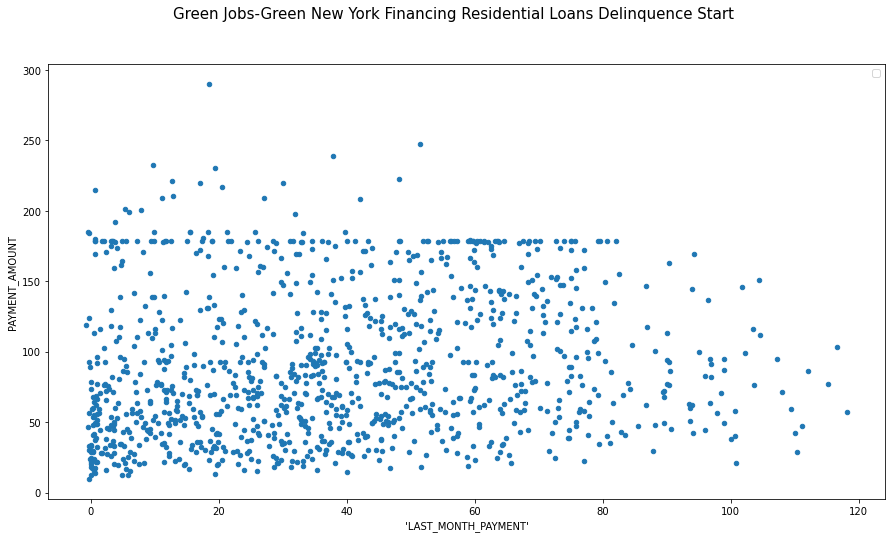

In [38]:
#Create a df with loans that are delinquent over $500
df_DA = df[(df.DELINQUENT_AMOUNT > 500) & (df.CANCEL_REASON != 'DEATH')]


#subtract days delinquent from # of months since origination to pinpoint first missed payment.
df_DA['MONTHS_DELINQUENT'] = df_DA['DAYS_DELINQUENT'].div(30).round(0)
df_DA['LAST_MONTH_PAYMENT'] = df_DA['MONTHS_SINCE_ORIGINATION'] - df_DA['MONTHS_DELINQUENT']

#Create subplot
fig9, ax13 = plt.subplots(figsize=(15, 8))

#add title
fig9.suptitle("Green Jobs-Green New York Financing Residential Loans Delinquence Start", fontsize=15)

#plot scatter dots. 
df_DA.plot(ax=ax13,
        x='LAST_MONTH_PAYMENT',
        y='PAYMENT_AMOUNT',
#         c='DELINQUENT_AMOUNT',
        kind='scatter',  
        ylabel= "PAYMENT_AMOUNT",
        xlabel= "'LAST_MONTH_PAYMENT'").legend(loc='best')


#Seems like loans are less likely to become delinquent after the 40th month and when payment is over $100.

## Create graph showing contractor performance. Top n contractors. Do certain contractors oversell that may lead to defaults?

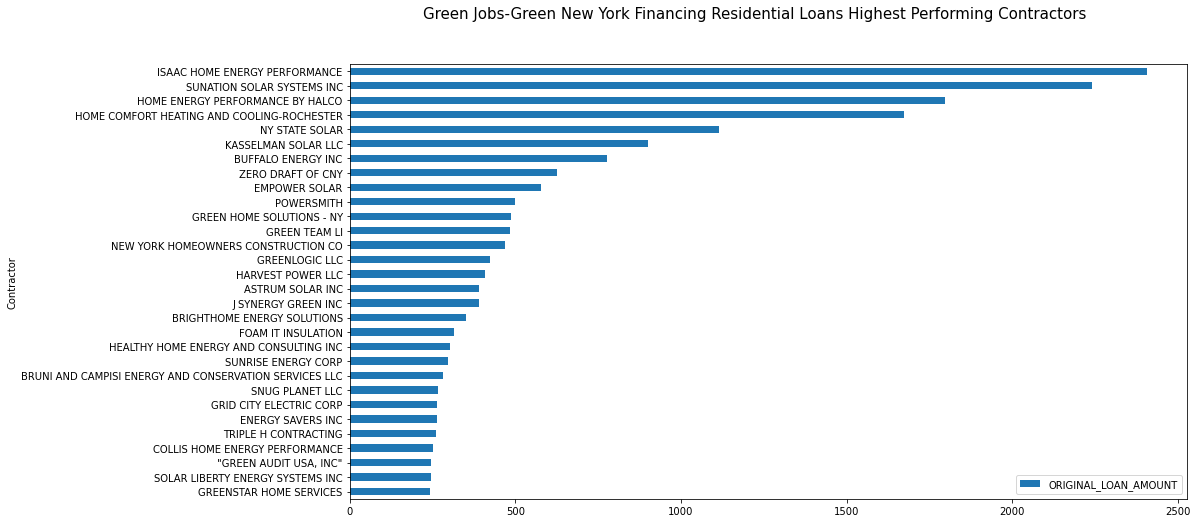

In [39]:
#Create groupby CONTRACTOR to get count (without Successors)
df_gb_CONTRACTOR_NAME_cnt = (df_suc_rem.groupby('CONTRACTOR_NAME')
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Sort and filter top n contractors
n= 30 #choose no. of top contractors
df_gb_CONTRACTOR_NAME_cnt = df_gb_CONTRACTOR_NAME_cnt.sort_values(by='ORIGINAL_LOAN_AMOUNT', ascending=False).head(n)
top_contractors = pd.unique(df_gb_CONTRACTOR_NAME_cnt['CONTRACTOR_NAME'])
df_gb_CONTRACTOR_NAME_cnt.set_index('CONTRACTOR_NAME', inplace=True)


# #Create subplot
fig10, ax14 = plt.subplots(figsize=(15, 8))

#add title
fig10.suptitle("Green Jobs-Green New York Financing Residential Loans Highest Performing Contractors", fontsize=15)

#plot bar chart. 
df_gb_CONTRACTOR_NAME_cnt.plot(ax=ax14,
                               kind='barh',  
                               ylabel= "Count of Loans",
                               xlabel= "Contractor").legend(loc='best')

ax14.invert_yaxis()

(0.0, 550.0)

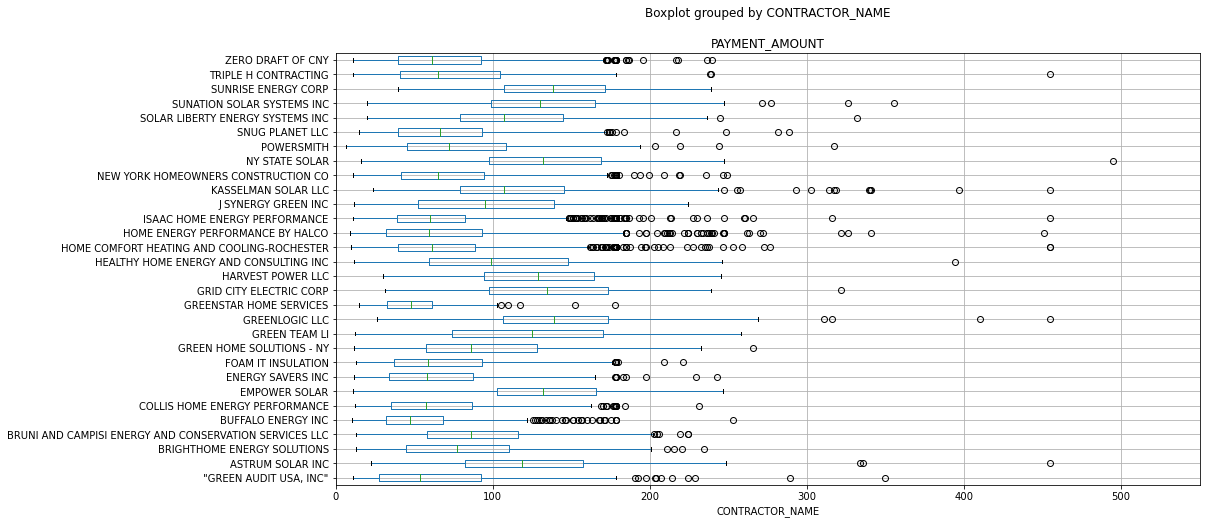

In [40]:
#Create groupby CONTRACTOR to get count (without Successors)
df_gb_CONTRACTOR_NAME_PA = df_suc_rem[['CONTRACTOR_NAME', 'PAYMENT_AMOUNT']]


# Filter to top contractors
df_gb_CONTRACTOR_NAME_PA = df_gb_CONTRACTOR_NAME_PA[df_gb_CONTRACTOR_NAME_PA['CONTRACTOR_NAME'].isin(top_contractors)]


#Create subplot
fig11, ax15 = plt.subplots(figsize=(15, 8))

# # #add title
fig11.suptitle("Green Jobs-Green New York Financing Residential Loans Average Payment Amt by Contractor", fontsize=15)

# # #plot boxplot. 
df_gb_CONTRACTOR_NAME_PA.boxplot(column='PAYMENT_AMOUNT', by='CONTRACTOR_NAME', ax=ax15, vert=False)

#Axis details
# #ax15.set_yscale('log')
ax15.set_xlim(0,550)

#set boxplot color gradient on dominant purpose (PV, EE, or other)


In [48]:
#Create dataframe with count of top n contractors with delinquent loans
df_DD_CONTRACTOR_defaults = (df_DD.groupby('CONTRACTOR_NAME')['DELINQUENT_AMOUNT'].count().reset_index())
df_DD_CONTRACTOR_defaults.sort_values(by='DELINQUENT_AMOUNT', ascending=False, inplace=True)
df_DD_CONTRACTOR_defaults.set_index('CONTRACTOR_NAME', inplace=True)
df_DD_CONTRACTOR_defaults.rename(columns={"DELINQUENT_AMOUNT": "DELINQUENT_COUNT"}, inplace=True)

#Create dataframe with count of top n contractors with delinquent loans
df_gb_CONTRACTOR_NAME_cnt.rename(columns={"ORIGINAL_LOAN_AMOUNT": "LOAN_COUNT"}, inplace=True)

#Merge both dfs based on contractor name
df_DD_CONTRACTOR_defaults = df_DD_CONTRACTOR_defaults.merge(df_gb_CONTRACTOR_NAME_cnt, left_index=True, right_index=True)

#calculate delinquency rate
df_DD_CONTRACTOR_defaults['DELINQUENCY_RATE'] = ((df_DD_CONTRACTOR_defaults.DELINQUENT_COUNT/df_DD_CONTRACTOR_defaults.LOAN_COUNT) * 100)
#df_DD_CONTRACTOR_defaults.sort_values(by='DELINQUENCY_RATE', ascending=False, inplace=True)
df_DD_CONTRACTOR_defaults

,DELINQUENT_COUNT,LOAN_COUNT,DELINQUENCY_RATE
CONTRACTOR_NAME,,,
HOME COMFORT HEATING AND COOLING-ROCHESTER,125,1673,7.471608
HOME ENERGY PERFORMANCE BY HALCO,113,1798,6.284761
ISAAC HOME ENERGY PERFORMANCE,93,2406,3.865337
BUFFALO ENERGY INC,59,777,7.593308
SUNATION SOLAR SYSTEMS INC,49,2240,2.187500
J SYNERGY GREEN INC,41,389,10.539846
POWERSMITH,36,499,7.214429
ZERO DRAFT OF CNY,35,626,5.591054
NEW YORK HOMEOWNERS CONSTRUCTION CO,30,469,6.396588


## Create pivots based pledge status. How many/much has not been pledge. Out of those that are pledged, which are bond worthy?